# TLC (R)

In [14]:
# Libraries
library(tidyverse)
library(readxl)

Course 2 tasks:

- Load data, explore, and extract the New York City TLC data with Python
- Use custom functions to organize the information within the New York City TLC dataset
- Build a dataframe for the New York City TLC project
- Create an executive summary for Automatidata

In [15]:
df <- read_csv(
    file.path("data/tlc_dataset.csv"),
    col_names = TRUE,
    col_types = NULL
)

New names:
• `` -> `...1`
Rows: 22699 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): tpep_pickup_datetime, tpep_dropoff_datetime, store_and_fwd_flag
dbl (15): ...1, VendorID, passenger_count, trip_distance, RatecodeID, PULoca...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [16]:
# Check df dimensions against documentation
expected_shape <- c(22699, 18)
sapply(seq(length(expected_shape)), \(i) expected_shape[i] == dim(df)[i])

[1] TRUE TRUE

In [17]:
# Row and col number
sprintf("%i rows and %i cols", nrow(df), ncol(df))

[1] "22699 rows and 18 cols"

In [18]:
# Clean col names
df <- janitor::clean_names(df)

In [19]:
# Display the top 10 entries
df |> head(n=10)

x1,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pu_location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0,0.3,16.56
35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0,0.3,20.80
106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0,0.3,8.75
38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0,0.3,27.69
30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0,0.3,17.80
23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0,0.3,12.36
37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0,0.3,59.16
69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0,0.3,19.58
8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0,0.3,9.80


In [20]:
# Extract col names
df_cols <- colnames(df)
df_cols

[1] "x1"                    "vendor_id"             "tpep_pickup_datetime" 
 [4] "tpep_dropoff_datetime" "passenger_count"       "trip_distance"        
 [7] "ratecode_id"           "store_and_fwd_flag"    "pu_location_id"       
[10] "do_location_id"        "payment_type"          "fare_amount"          
[13] "extra"                 "mta_tax"               "tip_amount"           
[16] "tolls_amount"          "improvement_surcharge" "total_amount"

**Question 1**: When reviewing the df.info() output, what do you notice about the different variables? Are there any null values? Are all of the variables numeric? Does anything else stand out?

There are no NA values. The dataset is perfectly balanced.

Some columns, e.g. dates, need formatting.

**Question 2**: When reviewing the df.describe() output, what do you notice about the distributions of each variable? Are there any questionable values?

We have at least one negative value among the fare amounts. This bears questioning. There are 20 non-positive fares in total in the dataset.

In the same column we have a maximum of $999 against the average of $13, but this does not seem inconsistent with the values in the trip distance column.

In [21]:
# Survey the df structure
str(df)

spc_tbl_ [22,699 × 18] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ x1                   : num [1:22699] 2.49e+07 3.56e+07 1.06e+08 3.89e+07 3.08e+07 ...
 $ vendor_id            : num [1:22699] 2 1 1 2 2 2 2 2 2 1 ...
 $ tpep_pickup_datetime : chr [1:22699] "03/25/2017 8:55:43 AM" "04/11/2017 2:53:28 PM" "12/15/2017 7:26:56 AM" "05/07/2017 1:17:59 PM" ...
 $ tpep_dropoff_datetime: chr [1:22699] "03/25/2017 9:09:47 AM" "04/11/2017 3:19:58 PM" "12/15/2017 7:34:08 AM" "05/07/2017 1:48:14 PM" ...
 $ passenger_count      : num [1:22699] 6 1 1 1 1 6 1 1 1 1 ...
 $ trip_distance        : num [1:22699] 3.34 1.8 1 3.7 4.37 ...
 $ ratecode_id          : num [1:22699] 1 1 1 1 1 1 1 1 1 1 ...
 $ store_and_fwd_flag   : chr [1:22699] "N" "N" "N" "N" ...
 $ pu_location_id       : num [1:22699] 100 186 262 188 4 161 79 237 234 239 ...
 $ do_location_id       : num [1:22699] 231 43 236 97 112 236 241 114 249 237 ...
 $ payment_type         : num [1:22699] 1 1 1 1 2 1 1 1 2 1 ...
 $ fare_amount          :

In [22]:
# Check cols for NAs
lapply(
    df_cols,
    \(c) NA %in% df[c]
)

[[1]]
[1] FALSE

[[2]]
[1] FALSE

[[3]]
[1] FALSE

[[4]]
[1] FALSE

[[5]]
[1] FALSE

[[6]]
[1] FALSE

[[7]]
[1] FALSE

[[8]]
[1] FALSE

[[9]]
[1] FALSE

[[10]]
[1] FALSE

[[11]]
[1] FALSE

[[12]]
[1] FALSE

[[13]]
[1] FALSE

[[14]]
[1] FALSE

[[15]]
[1] FALSE

[[16]]
[1] FALSE

[[17]]
[1] FALSE

[[18]]
[1] FALSE

In [23]:
# Count NAs per col
lapply(
    df_cols,
    \(c) sum(is.na(df[c]))
)

[[1]]
[1] 0

[[2]]
[1] 0

[[3]]
[1] 0

[[4]]
[1] 0

[[5]]
[1] 0

[[6]]
[1] 0

[[7]]
[1] 0

[[8]]
[1] 0

[[9]]
[1] 0

[[10]]
[1] 0

[[11]]
[1] 0

[[12]]
[1] 0

[[13]]
[1] 0

[[14]]
[1] 0

[[15]]
[1] 0

[[16]]
[1] 0

[[17]]
[1] 0

[[18]]
[1] 0

In [24]:
# Survey the summary statistics
df |> summary()

       x1              vendor_id     tpep_pickup_datetime tpep_dropoff_datetime
 Min.   :    12127   Min.   :1.000   Length:22699         Length:22699         
 1st Qu.: 28520556   1st Qu.:1.000   Class :character     Class :character     
 Median : 56731504   Median :2.000   Mode  :character     Mode  :character     
 Mean   : 56758486   Mean   :1.556                                             
 3rd Qu.: 85374524   3rd Qu.:2.000                                             
 Max.   :113486300   Max.   :2.000                                             
 passenger_count trip_distance     ratecode_id     store_and_fwd_flag
 Min.   :0.000   Min.   : 0.000   Min.   : 1.000   Length:22699      
 1st Qu.:1.000   1st Qu.: 0.990   1st Qu.: 1.000   Class :character  
 Median :1.000   Median : 1.610   Median : 1.000   Mode  :character  
 Mean   :1.642   Mean   : 2.913   Mean   : 1.043                     
 3rd Qu.:2.000   3rd Qu.: 3.060   3rd Qu.: 1.000                     
 Max.   :6.000   Max

In [41]:
# How many non-positive fares?
nonnegative_fares <- df |>
    filter(fare_amount <= 0) |>
    nrow()

cat("There are", nonnegative_fares, "non-negative fares in all.")

There are 20 non-negative fares in all.

**Question 1:** Sort your first variable (`trip_distance`) from maximum to minimum value, do the values seem normal?

The ten highest trip distances are far above the average, but not implausibly so.

**Question 2:** Sort by your second variable (`total_amount`), are any values unusual?

The highest total amount and fare seems to be an outlier inconsistent with the remaining data after all. The initial assessment needs revising.

**Question 3:** Are the resulting rows similar for both sorts? Why or why not?

There seems to be a somewhat unsystematic relationship between the fares and trip distances.

In [26]:
# Survey the trip_distance col
df |>
    arrange(desc(trip_distance)) |>
    head(n=10)

x1,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pu_location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
90375786,1,10/26/2017 2:45:01 PM,10/26/2017 4:12:49 PM,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31
68023798,2,08/11/2017 2:14:01 PM,08/11/2017 3:17:31 PM,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20
77309977,2,09/14/2017 1:44:44 PM,09/14/2017 2:34:29 PM,1,28.23,2,N,13,132,1,52.00,0.0,0.5,4.40,5.76,0.3,62.96
43431843,1,05/15/2017 8:11:34 AM,05/15/2017 9:03:16 AM,1,28.20,2,N,90,132,1,52.00,0.0,0.5,11.71,5.76,0.3,70.27


In [27]:
# Sort by the total_amount col
df |>
    arrange(total_amount) |>
    tail(n=10)

x1,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pu_location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0,0.0,0.00,0.00,0.3,150.30
51920669,1,06/19/2017 12:51:17 AM,06/19/2017 12:52:12 AM,2,0.00,5,N,265,265,1,120.00,0,0.0,20.00,11.52,0.3,151.82
111653084,1,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,1,7.30,5,N,1,1,1,152.00,0,0.0,0.00,0.00,0.3,152.30
101198443,2,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,1,25.50,5,N,132,265,2,140.00,0,0.5,0.00,16.26,0.3,157.06
49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0,0.0,55.50,16.26,0.3,179.06
55538852,2,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,1,0.00,5,N,265,265,1,200.00,0,0.5,11.00,0.00,0.3,211.80
107108848,2,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,1,0.00,5,N,265,265,1,175.00,0,0.0,46.69,11.75,0.3,233.74
40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0,0.5,51.64,5.76,0.3,258.21
107558404,2,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,2,0.00,5,N,265,265,2,450.00,0,0.0,0.00,0.00,0.3,450.30


In [28]:
# Find the total_amount col index
total_amount_index <- which(colnames(df) == "total_amount")
col_number <- ncol(df)

cat("total_amount col index:\n")
sprintf("%i out of %i", total_amount_index, col_number)

total_amount col index:


[1] "18 out of 18"

## A look at payment types

In [42]:
# Find col containing "payment"
payment_col_mask <- str_detect(df_cols, "payment")
payment_col <- df[payment_col_mask]

# Find the unique values
payment_unique <- unique(unlist(payment_col, use.names = FALSE))

# Count the unique values
payment_type_count <- length(payment_unique)

cat("Customers have used", payment_type_count, "different payment methods.")

Customers have used 4 different payment methods.

In [30]:
# How many of each payment type are represented in the data?

payment_key <- "1 = Credit card
2 = Cash
3 = No charge
4 = Dispute
5 = Unknown
6 = Voided trip"

# Extract the keys (numbers)
payment_codes <- str_extract_all(payment_key, "\\d+")[[1]] |>
    as.integer()

# Extract the values
payment_types <- str_extract_all(payment_key, "(?<= = )[a-zA-Z ]+")[[1]] |>
    str_trim() |>
    str_to_lower() |>
    str_replace(" ", "_")

# Construct a referable key for later reference
payment_key_list <- as.list(payment_types)
names(payment_key_list) <- payment_codes

# Log all present payment types
for (i in seq_along(payment_codes)) {
    pay_code <- payment_codes[i]
    pay_type <- payment_types[i]

    if (pay_code %in% payment_unique) {
        print(
            paste0(pay_type, " is present in the dataset.")
        )
    }
}

[1] "credit_card is present in the dataset."
[1] "cash is present in the dataset."
[1] "no_charge is present in the dataset."
[1] "dispute is present in the dataset."


In [43]:
# What is the average tip for trips paid for with credit card?

    # Construct a vector key
payment_key_vec <- setNames(
    as.vector(payment_types),
    as.vector(payment_codes)
)

    # Recode payment type vals
df_recoded <- df |>
    group_by(payment_type) |>
    mutate(
        payment_type = payment_key_vec[as.character(payment_type)]
    ) 

    # Group and average
tip_avgs <- df_recoded |>
    summarise(
        avg_tip = mean(tip_amount),
        .groups = "drop"
    )

cat("Average tip per payment type:\n")
tip_avgs

Average tip per payment type:


payment_type,avg_tip
<chr>,<dbl>
cash,0.0000
credit_card,2.7298
dispute,0.0000
no_charge,0.0000


In [44]:
# Payment type counts
cat("Number of customers per payment type:\n")
df_recoded |>
    count(payment_type)

Number of customers per payment type:


payment_type,n
<chr>,<int>
cash,7267
credit_card,15265
dispute,46
no_charge,121


In [45]:
# What is the average tip for trips paid for with cash?
cat("Tip from the average cash-payer:\n")
tip_avgs |>
    filter(payment_type == "cash")

Tip from the average cash-payer:


payment_type,avg_tip
<chr>,<dbl>
cash,0


In [46]:
# How many times is each vendor ID represented in the data?
cat("Number of times a vendor appears in the dataset:\n")
df |>
    count(vendor_id)

Number of times a vendor appears in the dataset:


vendor_id,n
<dbl>,<int>
1,10073
2,12626


In [47]:
# What is the mean total amount for each vendor?
cat("Average total payment per vendor:\n")
df |>
    group_by(vendor_id) |>
    summarise(
        mean_total = mean(total_amount),
        .groups = "drop"
    )

Average total payment per vendor:


vendor_id,mean_total
<dbl>,<dbl>
1,16.29812
2,16.32038


In [36]:
# Filter the data for credit card payments only
df_filtered <- df_recoded |>
    filter(payment_type == "credit_card")

df_filtered |> head(n=5)

x1,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pu_location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,credit_card,13.0,0.0,0.5,2.76,0,0.3,16.56
35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,credit_card,16.0,0.0,0.5,4.00,0,0.3,20.80
106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,credit_card,6.5,0.0,0.5,1.45,0,0.3,8.75
38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,credit_card,20.5,0.0,0.5,6.39,0,0.3,27.69
23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,credit_card,9.0,0.5,0.5,2.06,0,0.3,12.36


In [50]:
# Calculate the average tip amount for each passenger count (credit card payments only)
avg_tip_per_passenger_count <- df_filtered |>
    group_by(passenger_count) |>
    summarise(
        avg_tip = mean(tip_amount)
    )

cat("Average tip by number of passengers:\n")
avg_tip_per_passenger_count

Average tip by number of passengers:


passenger_count,avg_tip
<dbl>,<dbl>
0,2.610370
1,2.714681
2,2.829949
3,2.726800
4,2.607753
5,2.762645
6,2.643326


In [56]:
# Average tip per head

avg_tip_per_capita <- avg_tip_per_passenger_count |>
    mutate(
        avg_tip_per_capita = avg_tip / passenger_count
    )

cat("Average tip per head by number of passengers:\n")
avg_tip_per_capita

Average tip per head by number of passengers:


passenger_count,avg_tip,avg_tip_per_capita
<dbl>,<dbl>,<dbl>
0,2.610370,Inf
1,2.714681,2.7146807
2,2.829949,1.4149746
3,2.726800,0.9089333
4,2.607753,0.6519382
5,2.762645,0.5525290
6,2.643326,0.4405543


In [54]:
# Rides with no passengers
no_passengers <- df |>
    filter(passenger_count <= 0) |>
    nrow()

cat("There are", no_passengers, "rides with no passengers.")

There are 33 rides with no passengers.

## A graphic look at some of the interesting questions

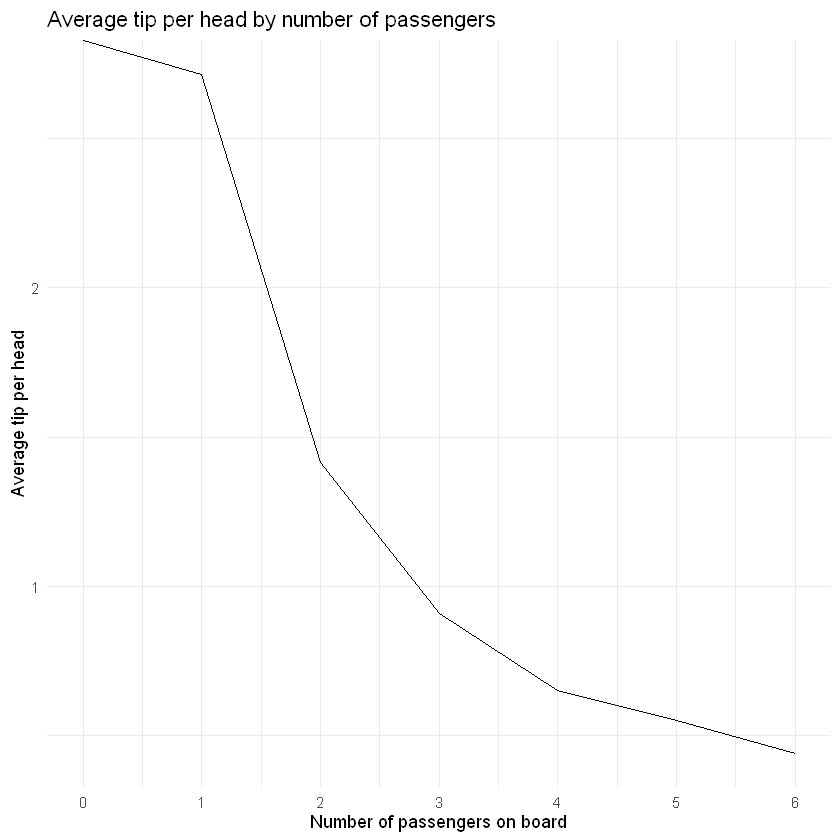

In [ ]:
# Relationship between passenger counts and tip per head
ggplot(data = avg_tip_per_capita, aes(x = passenger_count, y = avg_tip_per_capita)) + 
    geom_line() + 
    scale_x_continuous(
        breaks = seq(
            from = min(avg_tip_per_capita$passenger_count, na.rm = TRUE),
            to = max(avg_tip_per_capita$passenger_count, na.rm = TRUE),
            by = 1
        )
    ) + 
    theme_minimal() + 
    labs(
        title = "Average tip per head by number of passengers",
        x = "Number of passengers on board",
        y = "Average tip per head"
    )

Clearly the more passengers are on board, the less the driver gets tipped...

`geom_smooth()` using formula = 'y ~ x'


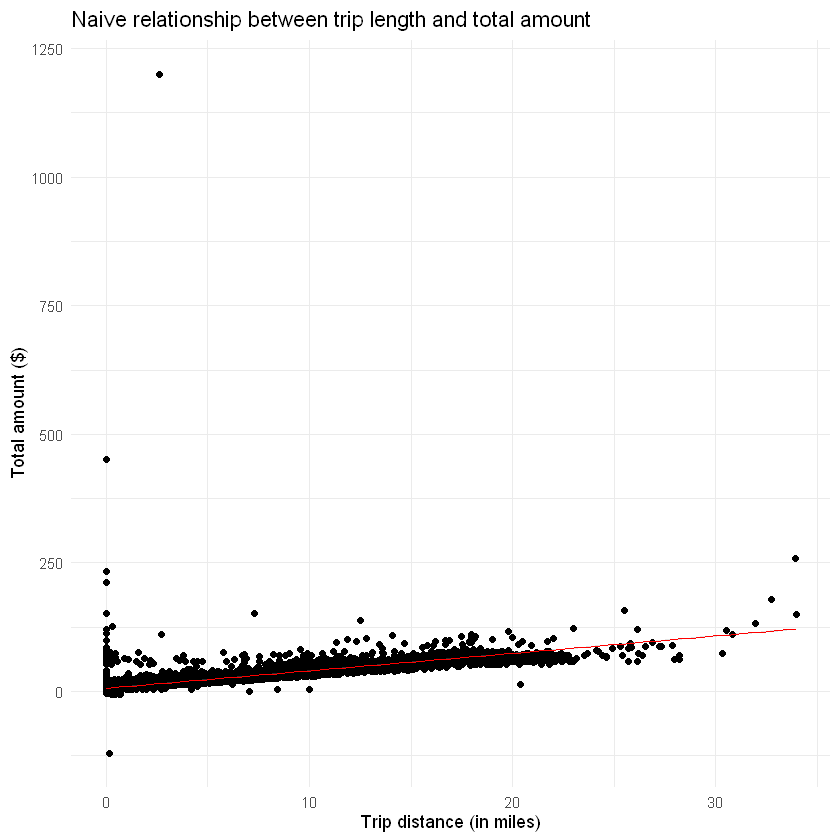

In [66]:
# Naive relationship between trip length and total amount
ggplot(data = df, aes(x = trip_distance, y = total_amount)) + 
    geom_point() + 
    geom_smooth(method = "lm", color="red", linewidth=0.5, alpha=0.3) + 
    theme_minimal() + 
    labs(
        title = "Naive relationship between trip length and total amount",
        x = "Trip distance (in miles)",
        y = "Total amount ($)"
    )

Despite some obvious outliers, there is clearly a positive relationship between trip distance and the amount customers pay. Nonetheless, a more sophisticated approach should control for the number of passengers at the very least.